<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Feature%20Selection/Impurity_based_feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




## Feature importance based on mean decrease in impurity (MDI)

* Load the olivetti faces dataset and limit the dataset to contain only the first five classes. 

* Train a random forest on the dataset and evaluate the impurity-based feature importance. 

* One drawback of this method is that it cannot be evaluated on a separate test set. Here, we are only interested in representing the information learned from the full dataset. 


**The limitations of MDI is not a problem for this dataset because:**

* All features are (ordered) numeric and will thus not suffer the cardinality bias

* We are only interested to represent knowledge acquired on the training set.

If these two conditions are not met, it is recommended to instead use the `permutation_importance`.



## Load the data

In [3]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [4]:
X = faces.data
y = faces.target

print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [7]:
print('Shape of feature set',X.shape)
print('Shape of target set', y.shape)

Shape of feature set (400, 4096)
Shape of target set (400,)


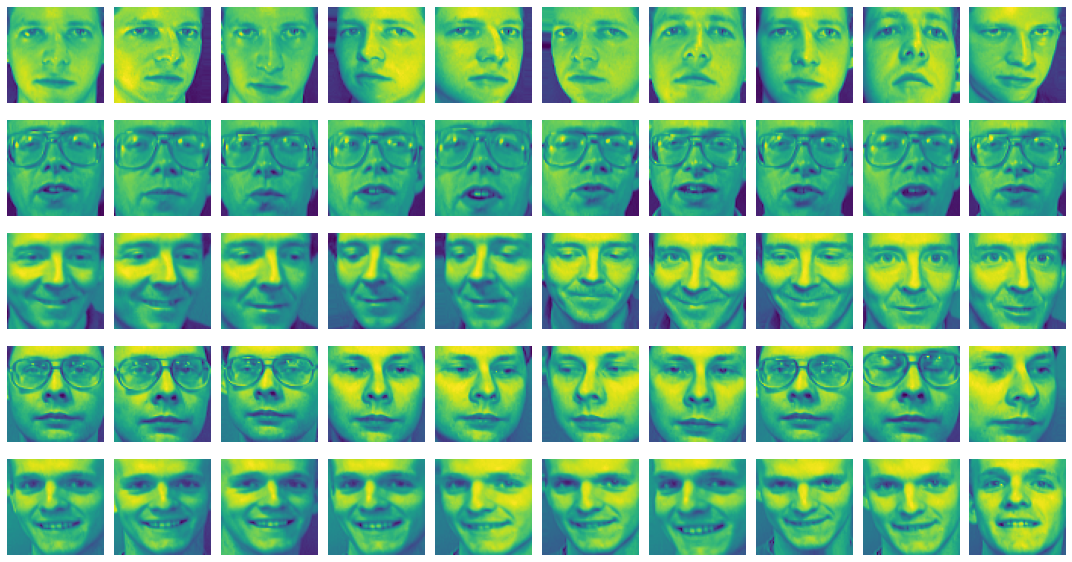

In [30]:
plt.figure(figsize=(15,8))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(X[i].reshape(64,64))
  plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

## Model Training 

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X, y)

RandomForestClassifier(n_estimators=1000)

In [34]:
print('Score :',rf.score(X, y))

Score : 1.0


### The impurity-based feature importances.

In [36]:
importance =  rf.feature_importances_

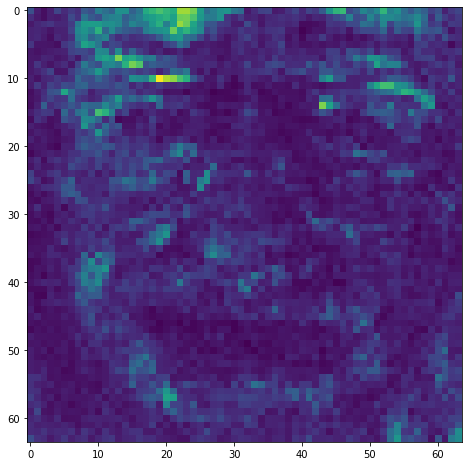

In [45]:
plt.figure(figsize=(8,8))
plt.imshow(importance.reshape(64,64));
